# Support Vector Regression (SVR)

## Dataset

Have a quick look at the dataset.

In [188]:
%cat ../00_data/Position_Salaries.csv | head

Position,Level,Salary
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [189]:
%cat ../00_data/Position_Salaries.csv | tail

Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000
CEO,10,1000000

## Goal

Try to suppose the dependent variable Salary based on other predictors using Support Vector Regression (SVR).

## Load the libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [191]:
df = pd.read_csv('../00_data/Position_Salaries.csv', sep=',')

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


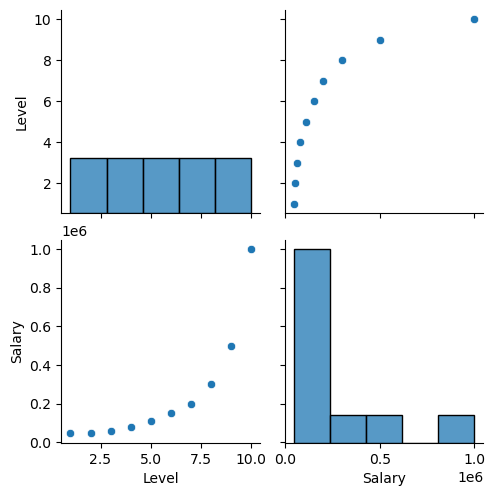

In [192]:
sns.pairplot(df);

## Data Preprocessing

In [193]:
df.shape

(10, 3)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [195]:
np.sum(df.isna(), axis=0)

Position    0
Level       0
Salary      0
dtype: int64

## Target Variable and Features

+ Target Variable: `Salary`
+ Features:
    + `Level`

In [196]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [197]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [198]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [199]:
# make 2D array
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling (Very Important for SVR!)

In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [201]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [202]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the model on whole dataset

In [203]:
from sklearn.svm import SVR

# RBF - the universal kernel, for linear relationship you can try linear
regressor = SVR(kernel='rbf')
model = regressor.fit(X, y.flatten())

C_value = model.get_params()['C']
gamma_value = model.get_params()['gamma']
epsilon_value = model.get_params()['epsilon']

print(f"C: {C_value}, Gamma: {gamma_value}, Epsilon: {epsilon_value}")

C: 1.0, Gamma: scale, Epsilon: 0.1


## Testing the model

In [204]:
y_pred = regressor.predict(X)
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

## Model Evaluation

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.24839989293792014
Mean Absolute Error: 0.22299274095734414
R^2 Score: 0.75


## Model Viz

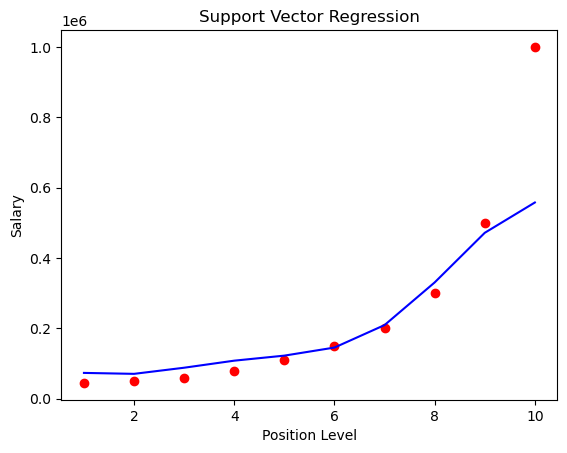

In [206]:
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color='red')
plt.plot(scaler_X.inverse_transform(X), scaler_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

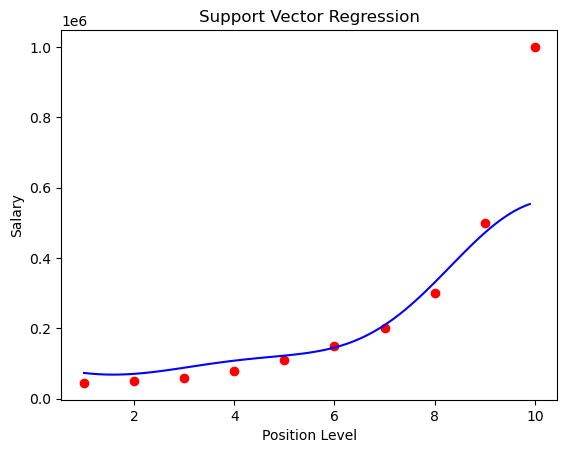

In [207]:
X_grid = np.arange(scaler_X.inverse_transform(X).min(), scaler_X.inverse_transform(X).max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color='red')
plt.plot(X_grid, scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result

In [208]:
# predicting a new value
new_data = [[6.5]]
print(f"New Data: {new_data}")
new_data = scaler_X.transform(new_data)
print(f"New Data (scaled): {new_data}")
new_result = regressor.predict(new_data)
print(f"New Result: {new_result}")
origin_scale_new_result = scaler_y.inverse_transform(new_result.reshape(-1, 1))
print(f"New Result (origin scale): {origin_scale_new_result}")

New Data: [[6.5]]
New Data (scaled): [[0.34815531]]
New Result: [-0.27861589]
New Result (origin scale): [[170370.0204065]]


## Tuning SVR

In [209]:
from sklearn.model_selection import GridSearchCV

In [210]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Seasing the best model
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y.flatten())

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error')

In [211]:
# best SVR
best_svr = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_svr.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Best SVR model: {best_svr}')
print(f'Best parameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2:.2f}')

Best SVR model: SVR(C=100, gamma=0.01)
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Squared Error: 0.32725296262441966
Mean Absolute Error: 0.28088921196801425
R^2 Score: 0.67


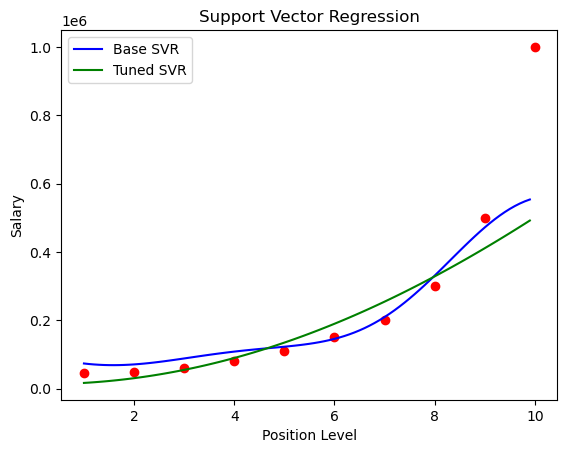

In [212]:
X_grid = np.arange(scaler_X.inverse_transform(X).min(), scaler_X.inverse_transform(X).max(), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color='red')
plt.plot(X_grid, scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X_grid)).reshape(-1, 1)), color='blue', label='Base SVR')
plt.plot(X_grid, scaler_y.inverse_transform(best_svr.predict(scaler_X.transform(X_grid)).reshape(-1, 1)), color='green', label='Tuned SVR')
plt.legend(loc="upper left")
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Pipeline

In [213]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

pipe = Pipeline(
    steps=[
        # Apply standardization to independent variable
        ("scaler", StandardScaler()), 
        # The last: fit SVR model and apply standardization to dependent variable
        ("svr", TransformedTargetRegressor(
            regressor=SVR(kernel='rbf'),
            transformer=StandardScaler()
        ))
    ]
)

pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr',
                 TransformedTargetRegressor(regressor=SVR(),
                                            transformer=StandardScaler()))])

In [214]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr',
                 TransformedTargetRegressor(regressor=SVR(),
                                            transformer=StandardScaler()))])

In [215]:
# make prediction to a new data
result = pipe.predict([[6.5]])
print(f"Predicted value for Level=6.5: {result}")

Predicted value for Level=6.5: [170370.0204065]


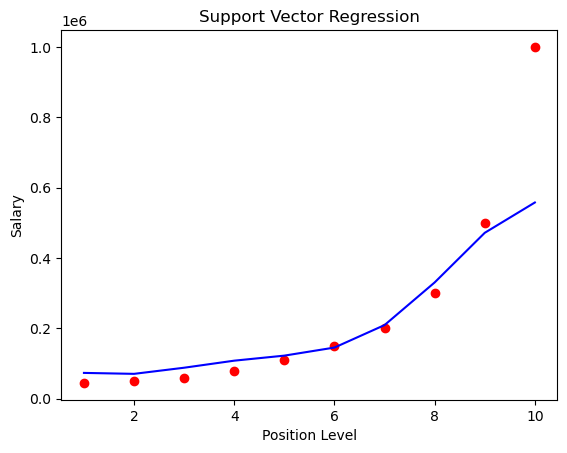

In [216]:
# Data viz
plt.scatter(X, y, color='red')
plt.plot(X, pipe.predict(X), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [217]:
param_grid = {
    'svr__regressor__C': [0.1, 1, 10, 100],
    'svr__regressor__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svr__regressor__kernel': ['rbf']
}

# Seasing the best model
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
best_model = grid_search.fit(X, y)
y_pred = grid_search.best_estimator_.predict(X)

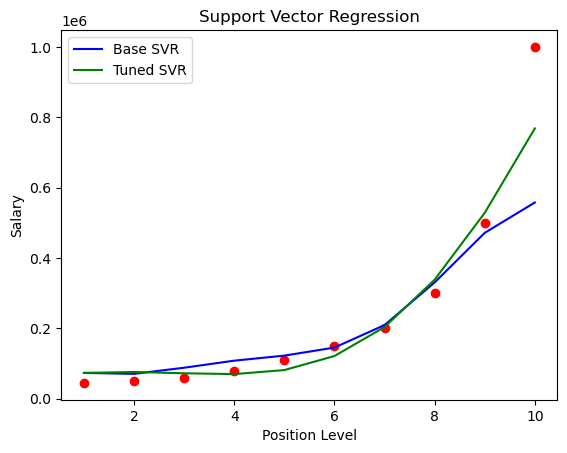

In [220]:
# Data viz
plt.scatter(X, y, color='red')
plt.plot(X, pipe.predict(X), color='blue', label='Base SVR')
plt.plot(X, y_pred, color='green', label='Tuned SVR')
plt.title('Support Vector Regression')
plt.legend(loc="upper left")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [219]:
# best model
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 5930456933.045692
Mean Absolute Error: 43617.21134366994
R^2 Score: 0.93
